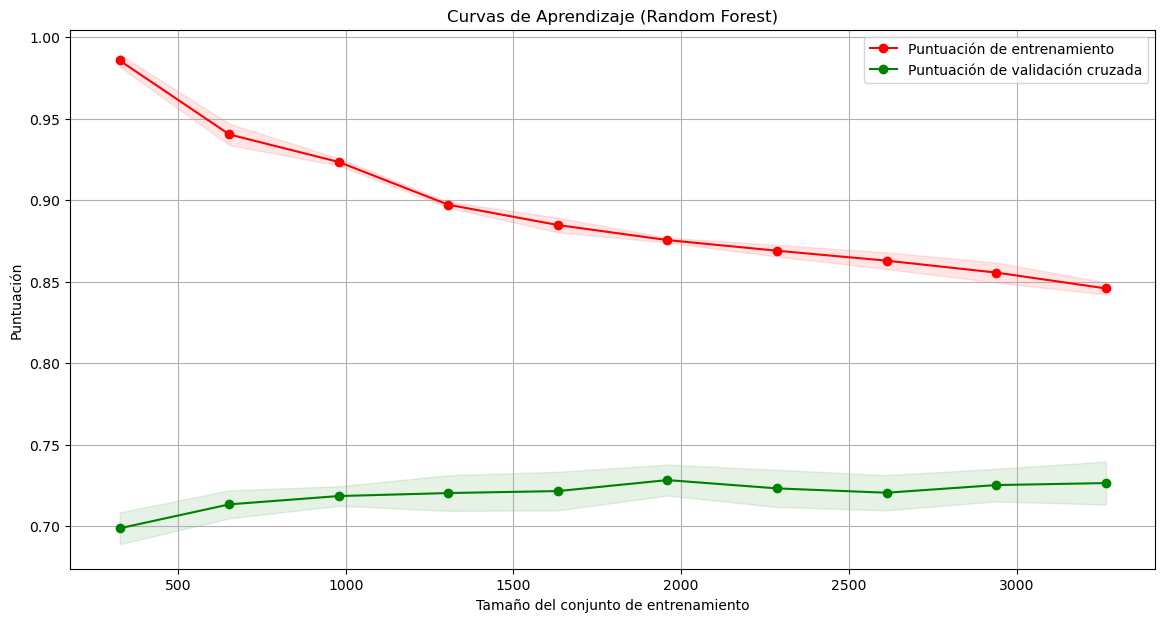

In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import joblib

# Cargar el conjunto de datos
df = pd.read_csv('cardio_train.csv', sep=';')

# Dividir los datos en conjunto de entrenamiento y prueba
X = df.drop('cardio', axis=1)
y = df['cardio']
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construir un pipeline para el modelo Random Forest
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier())
])

# Definir la grilla de hiperparámetros para GridSearchCV
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20]
}

# Realizar búsqueda de hiperparámetros para Random Forest
rf_grid = GridSearchCV(rf_pipe, param_grid_rf, cv=3, error_score='raise')
rf_grid.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo Random Forest
best_params_rf = rf_grid.best_params_
best_model_rf = rf_grid.best_estimator_

# Guardar el mejor modelo Random Forest en un archivo
joblib.dump(best_model_rf, 'best_model_rf.pkl')

# Generar curvas de aprendizaje
train_sizes_rf, train_scores_rf, valid_scores_rf = learning_curve(
    best_model_rf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3, n_jobs=-1
)

# Calcular promedios y desviaciones estándar de las puntuaciones
train_scores_rf_mean = np.mean(train_scores_rf, axis=1)
train_scores_rf_std = np.std(train_scores_rf, axis=1)
valid_scores_rf_mean = np.mean(valid_scores_rf, axis=1)
valid_scores_rf_std = np.std(valid_scores_rf, axis=1)

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(14, 7))
plt.title('Curvas de Aprendizaje (Random Forest)')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Puntuación')
plt.grid()

# Área sombreada para desviaciones estándar
plt.fill_between(train_sizes_rf, train_scores_rf_mean - train_scores_rf_std,
                 train_scores_rf_mean + train_scores_rf_std, alpha=0.1, color="r")
plt.fill_between(train_sizes_rf, valid_scores_rf_mean - valid_scores_rf_std,
                 valid_scores_rf_mean + valid_scores_rf_std, alpha=0.1, color="g")

# Curvas de aprendizaje
plt.plot(train_sizes_rf, train_scores_rf_mean, 'o-', color="r", label="Puntuación de entrenamiento")
plt.plot(train_sizes_rf, valid_scores_rf_mean, 'o-', color="g", label="Puntuación de validación cruzada")

plt.legend(loc="best")
plt.show()
